In [1]:
from model import *
import numpy as np


# Plotting
# from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import json
import os

# For file dialogs
import tkinter as tk
from tkinter import filedialog
root = tk.Tk()
root.withdraw()

''

# Examining the scattering models
Comparing own implementation of Rayleigh scattering to Mie scattering for GNP

[1.38610976e-08-2.55802108e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.46341878e-08-2.42553718e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.52145564e-08-2.2835614e-08j 0.00000000e+00+0.0000000e+00j
 0.00000000e+00+0.0000000e+00j]
[1.55934512e-08-2.12672705e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.55844631e-08-1.97089694e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.53308784e-08-1.83705058e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.5071507e-08-1.72374578e-08j 0.0000000e+00+0.00000000e+00j
 0.0000000e+00+0.00000000e+00j]
[1.45753303e-08-1.60996104e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.41735136e-08-1.52245928e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.37855048e-08-1.44262769e-08j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j]
[1.33585722e-08-1.36521901e-08j 0.00000000e+00

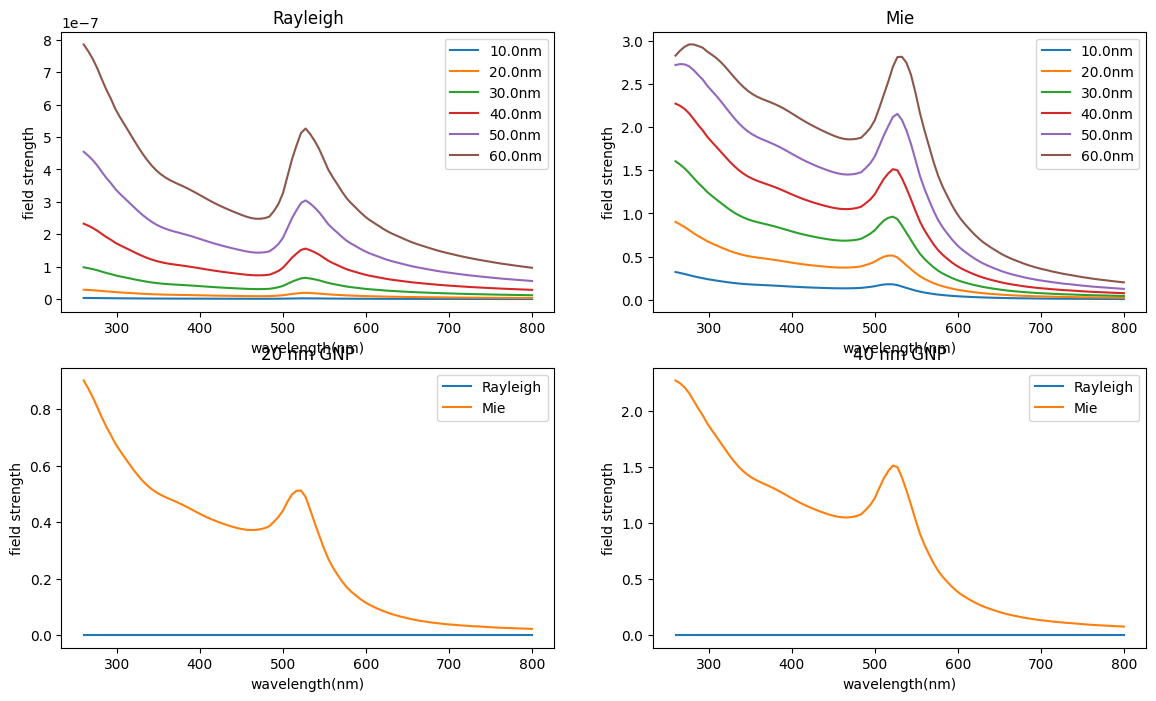

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(14, 8))
ax = ax.ravel()

for diameter in np.linspace(10, 60, 6):
    params = DesignParams(
        diameter=diameter,
        z_focus = diameter/2,
        z_p = diameter/2,
    )

    wavelens = np.linspace(260, 800, 100)
    scatter_intensity_rayleigh = np.zeros(len(wavelens))
    scatter_intensity_mie = np.zeros(len(wavelens))
    for i, wavelen in enumerate(wavelens):
        params.wavelen = wavelen
        scatter_field = calculate_scatter_field(params,multipolar=False)
        scatter_intensity_rayleigh[i] = np.abs(scatter_field[0])
        scatter_field = calculate_scatter_field(params)
        scatter_intensity_mie[i] = np.abs(scatter_field[0])

    ax[0].plot(wavelens, scatter_intensity_rayleigh, label=f'{diameter:}nm')
    ax[1].plot(wavelens, scatter_intensity_mie, label=f'{diameter:}nm')

for j, diameter in enumerate(np.array([20, 40])):
    params = DesignParams(
        diameter = diameter,
        z_focus = 0,
        z_p = 0,
    )

    wavelens = np.linspace(260, 800, 100)
    scatter_intensity_rayleigh = np.zeros(len(wavelens))
    scatter_intensity_mie = np.zeros(len(wavelens))
    for i, wavelen in enumerate(wavelens):
        params.wavelen = wavelen
        scatter_field = calculate_scatter_field(params, multipolar=False)
        scatter_intensity_rayleigh[i] = np.abs(scatter_field[0])
        scatter_field = calculate_scatter_field(params)
        scatter_intensity_mie[i] = np.abs(scatter_field[0])

    ax[2+j].plot(wavelens, scatter_intensity_rayleigh, label='Rayleigh')
    ax[2+j].plot(wavelens, scatter_intensity_mie, label='Mie')


ax[0].set_title('Rayleigh')
ax[1].set_title('Mie')
ax[2].set_title('20 nm GNP')
ax[3].set_title('40 nm GNP')
for axis in ax:
    axis.set_xlabel('wavelength(nm)')
    axis.set_ylabel('field strength')
    axis.legend()
plt.show()


# Vary Focus or Position

In [ ]:
save_path = filedialog.asksaveasfilename(
    title="Save Simulation to File",
    filetypes=[("Data", "*.npz")]  # Optional filter
)
if (save_path):
    # Move particle plot
    z_focus = np.linspace(-1, 1, 100)*10**-6
    z_p = 0

    config_path = filedialog.askopenfilename(
        title="Load previous parameters",
        filetypes=[("Data", "*.npz")]  # Optional filter
    )
    if config_path:
        data = np.load(config_path, allow_pickle=True)
        params = data['params'].item()
    else:
        params = DesignParams(
            t_oil = 100*10**-6,
            n_oil = 1.5023,
            n_glass = 1.4985,
            t_glass= 179*10**-6,
            n_scat = n_gold(wavelength),
            n_medium = n_water,
            wavelength = 525,
            a = 20/2)
    

    params.z_focus = z_focus
    params.z_p = z_p

    scatter_field = calculate_scatter_field(params)

    if isinstance(z_focus, (list, np.ndarray)):
        intensities = np.zeros((len(z_focus), len(xs), len(ys)))
        p = replace(params)
        for m, z_f in enumerate(z_focus):
            p.z_focus = z_f
            intensity = calculate_intensities(scatter_field, p)
            intensities[m] = intensity['tot']
    elif isinstance(z_p, (list, np.ndarray)):
        intensities = np.zeros((len(z_p), len(xs), len(ys)))
        p = replace(params)
        for m, z_particle in enumerate(z_p):
            p.z_p = z_particle
            intensity = calculate_intensities(scatter_field, p)
            intensities[m] = intensity['tot']
    
    np.savez(save_path, intensity=intensities, params=params)



In [16]:
# Plot Focus Data
file_path = filedialog.askopenfilename(
    title="Select a File",
    filetypes=[("Data", "*.npz")]
)
if (file_path):
   data = np.load(file_path, allow_pickle=True)
   intensities = data['intensity']
   params = data['params'].item()

   
   if isinstance(params.z_focus, (list, np.ndarray)):
      z = params.z_focus
      z_vary = 'focus'
   elif isinstance(params.z_p, (list, np.ndarray)):
      z = params.z_p
      z_vary = 'position'
   else:
      quit()

   fig, ax = plt.subplots(1,2, figsize=(12, 6))
   plt.rcParams.update({'font.size': 12})
   #extremum = max(np.abs(np.min(intensities) - 1), np.max(intensities) - 1)
   im = ax[0].imshow(intensities[0], cmap='gray', origin='lower')
   plt.colorbar(im, ax=ax[0])
   scalebar = ScaleBar(pxsize)
   ax[0].add_artist(scalebar)
   ax[0].axis('off')
   fig.suptitle(f'Varying {z_vary}')
   contrast_plot = ax[1].plot(intensities[:,pixels//2,pixels//2] - 1, z*10**6)
   contrast = ax[1].plot(intensities[0,pixels//2,pixels//2] - 1, z[0]*10**6, 'ro')[0]
   ax[1].set_ylabel(f'{z_vary} (micron)')
   ax[1].set_xlabel('contrast')


   def update(frame):
      im.set_array(intensities[frame])
      ax[0].set_title(f'{z_vary}: {z[frame]*10**6:.2f} micron')
      contrast.set_xdata([intensities[frame,pixels//2,pixels//2] - 1])
      contrast.set_ydata([z[frame]*10**6])
      return [im, contrast]

   ani = FuncAnimation(fig, update, frames=len(intensities), interval=100)
   plt.show()
   #ani.save('focusgnp.gif')
   #plt.close()
   #display(HTML(ani.to_jshtml()))
   

# Making a simple image of a focused GNP on the surface

In [ ]:
# Single plot

wavelength = 525
diameter = 60
radius = diameter/2
#polarization = np.array([1, 0, 0]) # x polarization

params = DesignParams(
    polarization = np.array([1,0,0]),
    z_p = 0,
    z_focus = 0,
    wavelen = wavelength,
    n_scat = n_ps,
    n_medium = n_water,
    a = radius)

setup_params = SetupParams(roi_size=2*10**-6, magnification=1000)
camera = Camera(setup_params)

scatter_field = calculate_scatter_field(params)
intensity = calculate_intensities(scatter_field, params, camera)

fig, ax = plt.subplots()
p = ax.imshow(intensity['scat'])
ax.set_axis_off()
fig.colorbar(p)
ax.add_artist(ScaleBar(camera.pxsize_obj))

# 3x1 plot
# fig, ax = plt.subplots(1, 3, figsize=(12,4))

# for i, intens in enumerate(['if', 'scat', 'tot']):
#     p = ax[i].imshow(intensity[intens])
#     ax[i].set_axis_off()
#     scalebar = ScaleBar(pxsize)
#     ax[i].add_artist(scalebar)
#     fig.colorbar(p, ax=ax[i])
#     ax[i].set_title(intens + ' intensity')

# plt.show()

In [ ]:
# Move focus contrast plot


def centroid_contrast_variable_focus(p, z_focuses):
    params = p
    focus_contrasts = np.zeros(len(z_focuses))

    # Custom camera
    xs = np.array([0])
    ys = np.array([0])
    rs = np.array([0])
    phi = np.array([0])
    xy_rs = [[0]]
    camera_params = (xs, ys, rs, phi, xy_rs)
    scatter_field = calculate_scatter_field(params)
    for m, z_focus in enumerate(z_focuses):
        params.z_focus = z_focus
        intensity = calculate_intensities(scatter_field, params, camera_params)
        focus_contrasts[m] = intensity['sig'][0,0]
    
    return focus_contrasts

wavelength = 525

z_focuses_11 = np.linspace(-1, 1, 200)*10**-6
z_focuses_27 = np.linspace(2, 7, 200)*10**-6

diameter = 60
radius = diameter/2
params_1 = DesignParams(
        z_p = 0,
        n_oil0 = 1.5,
        n_glass0 = 1.5,
        t_oil0 = 100*10**-6,
        t_glass0 = 170*10**-6,
        n_oil = 1.5018,
        n_glass = 1.499,
        t_glass= 184*10**-6,
        wavelen = wavelength,
        n_scat = n_ps,
        n_medium = n_water,
        a = radius)
focus_contrasts_ps0 = centroid_contrast_variable_focus(params_1, z_focuses_11)
diameter = 20
radius = diameter/2
params_2 = DesignParams(
        z_p = 0,
        n_oil0 = 1.5,
        n_glass0 = 1.5,
        t_oil0 = 100*10**-6,
        t_glass0 = 170*10**-6,
        n_oil = 1.5023,
        n_glass = 1.4985,
        t_glass= 179*10**-6,
        wavelen = wavelength,
        n_scat = n_gold(wavelength),
        n_medium = n_water,
        a = radius)
focus_contrasts_gold0 = centroid_contrast_variable_focus(params_2, z_focuses_11)
params_3 = DesignParams(
        z_p = 4*10**-6,
        n_oil0 = 1.5,
        n_glass0 = 1.5,
        t_oil0 = 100*10**-6,
        t_glass0 = 170*10**-6,
        n_oil = 1.5023,
        n_glass = 1.4985,
        t_glass= 179*10**-6,
        wavelen = wavelength,
        n_scat = n_gold(wavelength),
        n_medium = 1.33,
        a = radius)
focus_contrasts_gold4 = centroid_contrast_variable_focus(params_3, z_focuses_27)

In [4]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(focus_contrasts_ps0, z_focuses_11/10**-6)
ax[1].plot(focus_contrasts_gold0, z_focuses_11/10**-6)
ax[2].plot(focus_contrasts_gold4, z_focuses_27/10**-6)
for axis in ax:
    axis.set_ylabel('focus (micron)')
    axis.set_xlabel('contrast')
    axis.grid()

ax[0].set_title('Polystyrene NP at 0 micron')
ax[1].set_title('GNP at 0 micron')
ax[2].set_title('GNP at 4 micron')

plt.show()

In [ ]:
# Move focus contrast plot


def centroid_contrast_variable_particle(p, z_particles):
    params = p
    contrasts = np.zeros(len(z_particles))

    # Custom camera
    xs = np.array([0])
    ys = np.array([0])
    rs = np.array([0])
    phi = np.array([0])
    xy_rs = [[0]]
    camera_params = (xs, ys, rs, phi, xy_rs)
    scatter_field = calculate_scatter_field(params)
    for m, z_p in enumerate(z_particles):
        params.z_p = z_p
        intensity = calculate_intensities(scatter_field, params, camera_params)
        contrasts[m] = intensity['sig'][0,0]
    
    return contrasts

wavelength = 525

diameter = 10
radius = diameter/2
z_particles = np.linspace(0, 3.12*10**-6, 1000)
params_m = DesignParams(
        z_focus = 1.5*10**-6,
        n_oil0 = 1.5,
        n_glass0 = 1.5,
        t_oil0 = 100*10**-6,
        t_glass0 = 170*10**-6,
        n_oil = 1.5018,
        n_glass = 1.499,
        t_glass= 184*10**-6,
        wavelen = wavelength,
        n_scat = n_gold(wavelength),
        n_medium = n_glyc,
        a = radius)
move_contrasts_gnp = centroid_contrast_variable_particle(params_m, z_particles)

In [6]:
fig, ax = plt.subplots(1, figsize=(4,6))
ax.plot(move_contrasts_gnp, z_particles/10**-6)
ax.set_ylabel('particle position (micron)')
ax.set_xlabel('contrast')
ax.grid()

In [2]:
# Contrast plot

diameters = np.linspace(2, 80, 100)
wavelength = 525

params = DesignParams(
    wavelen = wavelength,
    n_medium = n_water)
    


contrast = np.zeros_like(diameters)
scatter_intensity = np.zeros_like(diameters)
interference_intensity = np.zeros_like(diameters)

# 1 pixel camera
params.roi_size = params.pxsize/params.magnification
camera = Camera(params)

for i, diameter in enumerate(diameters):
    params.diameter = diameter

    scatter_field = calculate_scatter_field(params)
    
    intensity = calculate_intensities(scatter_field, params, camera, r_resolution=2)
    scatter_intensity[i] = intensity['scat'][0,0]
    interference_intensity[i] = intensity['if'][0,0]
    contrast[i] = intensity['sig'][0,0]


UnboundLocalError: cannot access local variable 'detector_field' where it is not associated with a value

In [63]:
print(interference_intensity)

[  149579.77734122   246123.24431346   357418.25018364   481667.78523805
   617579.68060643   764158.09336423   920597.50221759  1086222.08812096
  1260448.03762481  1442758.71101525  1632687.17708475  1829803.70547173
  2033706.29227424  2244013.32001118  2460357.69617173  2682382.04978592
  2909734.69786983  3142066.18583206  3379026.25930659  3620261.16705391
  3865411.22148824  4114108.56342404  4365975.09231066  4620620.53431073
  4877640.62917301  5136615.42369565  5397107.66517567  5658661.29294584
  5920800.03015144  6183026.08148618  6444818.94579951  6705634.35538215
  6964903.35637365  7222031.54713531  7476398.49359148  7727357.34244554
  7974234.6547914   8216330.48392479  8452918.72205657  8683247.74108173
  8906541.35249517  9122000.11089676  9328802.98422285  9526109.41180801
  9713061.76855726  9888788.25022954 10052406.18765216 10203025.79987115
 10339754.37755884 10461700.89275357 10567981.01603059 10657722.51576634
 10730071.00460411 10784195.98862711 10819297.16500

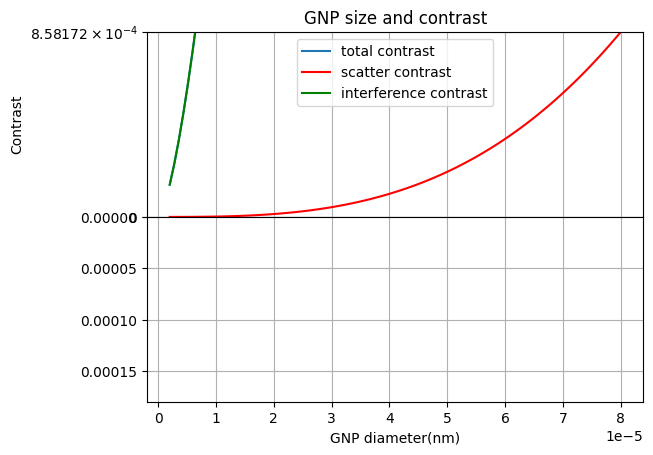

In [57]:
# Contrast plot plot
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'hspace': 0})
ax[0].set_yscale('symlog', linthresh=0.1)

ax[0].plot(diameters[contrast>0], contrast[contrast>0], label='total contrast')
ax[0].set_ylim(0, np.max(scatter_intensity))
ax[0].plot(diameters[scatter_intensity>0], scatter_intensity[scatter_intensity>0], label='scatter contrast', color='red')
ax[0].plot(diameters[interference_intensity>0], interference_intensity[interference_intensity>0], label='interference contrast', color='green')
ax[1].plot(diameters[contrast<0], contrast[contrast<0])
ax[1].plot(diameters[scatter_intensity<0], scatter_intensity[scatter_intensity<0])
ax[1].plot(diameters[interference_intensity<0], interference_intensity[interference_intensity<0])
ax[0].legend()
ax[1].grid()
ax[1].set_ylim(np.min(contrast)*1.2, 0)
ax[1].set_xlabel('GNP diameter(nm)')
ax[0].grid()
ax[0].set_ylabel('Contrast')
ax[0].set_title('GNP size and contrast')
plt.show()